In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

plt.style.use('default')

In [249]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

# Câu 1

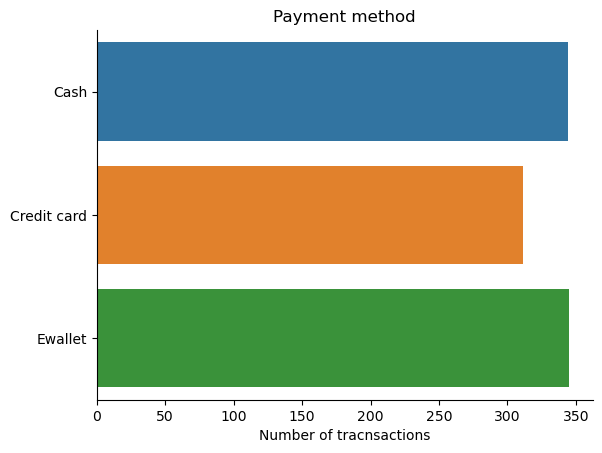

In [162]:
payment = df[['Payment','Invoice ID']].groupby(by='Payment').agg(['count'])
fig, ax = plt.subplots()
ax.set_title("Payment method")
ax.set_xlabel("Number of tracnsactions")
sns.barplot(
    data=payment, 
    y=list(payment.index), 
    x=payment.values.reshape((1,-1))[0],
    orient='h'
)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

## Nhận xét
- Số lượng các phiên giao dịch qua phương pháp thanh toán tiền mặt (cash) và ví điện tử  (Ewallet) khá giống nhau (gần 350 lượng giao dịch trong vòng 3 tháng)
- Số lượng các giao dịch quá thẻ tín dụng chiếm thấp nhất (hơn 300 phiên giao dịch) 

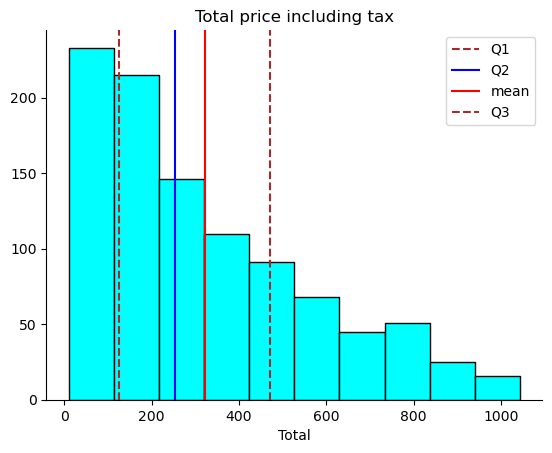

In [218]:
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
Q1, Q2, Q3 = df['Total'].quantile([0.25, 0.5, 0.75])
mean = df['Total'].mean()
ax.set_title("Total price including tax")
ax.set_xlabel("Total")
ax.hist(df['Total'],edgecolor='black', color='cyan')
ax.axvline(x=Q1,c='brown', linestyle='dashed')
ax.axvline(x=Q2,c='blue')
ax.axvline(x=mean,c='red')
ax.axvline(x=Q3,c='brown', linestyle='dashed')
ax.legend(['Q1', 'Q2','mean','Q3']);

## Nhận xét
- Phân phối của dữ liệu Total có phần hướng dương và có các giá trị

In [220]:
print('Q1',np.round(Q1, 2), sep=' = ')
print('Q2',np.round(Q2, 2), sep=' = ')
print('Q3',np.round(Q3, 2), sep=' = ')
print('mean',np.round(mean, 2), sep=' = ')

Q1 = 124.42
Q2 = 253.85
Q3 = 471.35
mean = 322.97


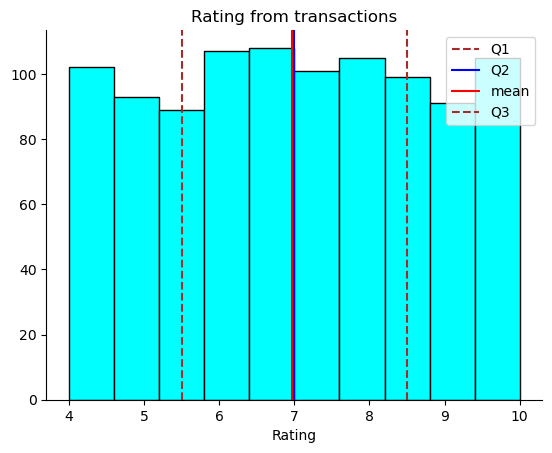

In [217]:
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
Q1, Q2, Q3 = df['Rating'].quantile([0.25, 0.5, 0.75])
mean = df['Rating'].mean()
ax.set_title("Rating from transactions")
ax.set_xlabel("Rating")
ax.hist(df['Rating'],edgecolor='black', color='cyan')
ax.axvline(x=Q1,c='brown', linestyle='dashed')
ax.axvline(x=Q2,c='blue')
ax.axvline(x=mean,c='red')
ax.axvline(x=Q3,c='brown', linestyle='dashed')
ax.legend(['Q1', 'Q2','mean','Q3']);

## Nhận xét
- Phân phối của dữ liệu rating khá đều với các giá trị:

In [221]:
print('Q1',np.round(Q1, 2), sep=' = ')
print('Q2',np.round(Q2, 2), sep=' = ')
print('Q3',np.round(Q3, 2), sep=' = ')
print('mean',np.round(mean, 2), sep=' = ')

Q1 = 124.42
Q2 = 253.85
Q3 = 471.35
mean = 322.97


# Câu 2

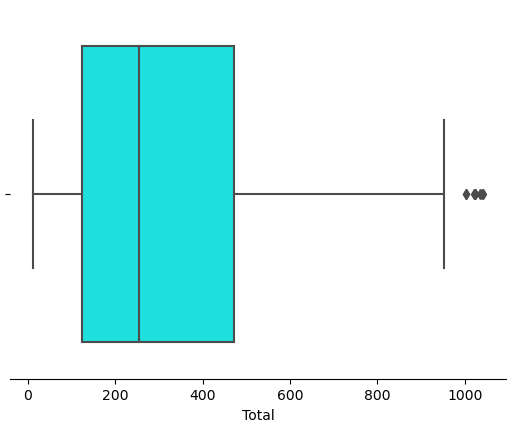

In [168]:
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sns.boxplot(data=df, x='Total',color='cyan');

In [248]:
IQR = df['Total'].quantile(0.75) - df['Total'].quantile(0.25)
notoutliers = df['Total'][(df['Total'] <= df['Total'].quantile(0.75) + 1.5*IQR)&(df['Total'] >= df['Total'].quantile(0.25)-1.5*IQR)]
print("Tổng số các outlier là:",df.shape[0] - notoutliers.shape[0], sep=' ') 

Tổng số các outlier là: 9


#  Câu 3

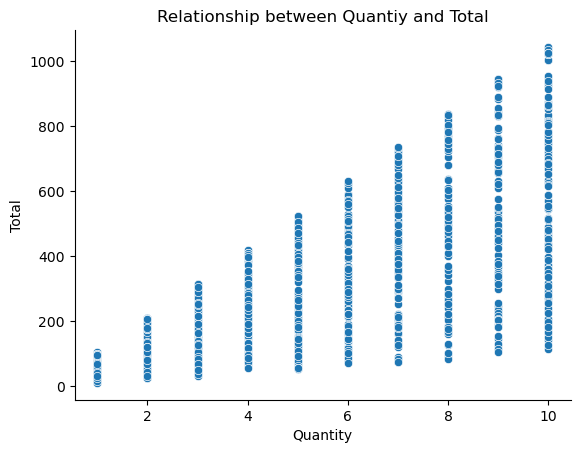

In [203]:
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)
ax.set_title("Relationship between Quantiy and Total")
sns.scatterplot(data=df, x='Quantity',y='Total');

# Câu 4

In [206]:
df['log_total'] = np.log(df['Total'])
print(smf.ols("Q('Quantity') ~ Q('Unit price') + Q('log_total')", data=df).fit().summary())

                            OLS Regression Results                            
Dep. Variable:          Q('Quantity')   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     3009.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                        17:30:02   Log-Likelihood:                -1515.6
No. Observations:                1000   AIC:                             3037.
Df Residuals:                     997   BIC:                             3052.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -10.2381      0.218    -

## Nhận xét
- Mô hình sử dụng 2 biến là **Unit price** và **ln(Total)**
- R-squared đạt mức 0.858 với p-value bằng 0